# MOwNiT
## Laboratorium 1
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji: https://juliadata.github.io/DataFrames.jl/stable/index.html





In [1]:
# za pierwszym razem, jeśli uruchamiamy lokalnie to instalujemy 
#using Pkg
#Pkg.add("DataFrames")

In [2]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
 Row │ MojaKolumna  x2        Col3  
     │ Int64        Float64   Bool  
─────┼──────────────────────────────
   1 │           1   4.0       true
   2 │           2   3.14159  false
   3 │           3   1.41421   true
   4 │           4  42.0      false

In [3]:
# ! - nie tworzy kopii, : - tworzy kopię
typeof(df1[!,2])

Vector{Float64} (alias for Array{Float64, 1})

In [4]:
typeof(df1[:,2])

Vector{Float64} (alias for Array{Float64, 1})

In [5]:
typeof(df1.Col3)

Vector{Bool} (alias for Array{Bool, 1})

In [6]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true
7,7,3.14159,true
8,8,1.41421,false
9,9,3.0,true


In [7]:
# ilosc wierszy
size(df2, 1) 

10

In [8]:
#ilosc kolumn
size(df2, 2) 

3

In [9]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [10]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [11]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
 Row │ MojaKolumna  Col2     Col3  
     │ Int64        Float64  Bool  
─────┼─────────────────────────────
   3 │           3  1.41421  false

In [12]:
# drugi i trzeci wiersz
df2[2:3, :]

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,true
2,3,1.41421,false


In [13]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Vector{Float64}:
 3.141592653589793
 1.4142135623730951

In [14]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

Row,Col2,Col3
,Float64,Bool
1,3.14159,true
2,1.41421,false


In [15]:
# pierwsze sześć wierszy
DataFrames.first(df2,6)

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true


In [16]:
# ostatnie sześć wierszy
DataFrames.last(df2,6)

Row,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,false
2,6,2.0,true
3,7,3.14159,true
4,8,1.41421,false
5,9,3.0,true
6,10,4.0,false


In [17]:
# nazwy kolumn
names(df2)

3-element Vector{String}:
 "MojaKolumna"
 "Col2"
 "Col3"

In [18]:
# typy kolumn
eltype.(eachcol(df2))

3-element Vector{DataType}:
 Int64
 Float64
 Bool

In [19]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,MojaKolumna,5.5,1,5.5,10,0,Int64
2,Col2,2.71116,1.41421,3.0,4.0,0,Float64
3,Col3,0.6,false,1.0,true,0,Bool


In [20]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [21]:
var(df2.Col2)

0.9150284373648316

In [22]:
#using Pkg
#Pkg.add("CSV")
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";",DataFrame)

Row,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [23]:
describe(mydata)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,fixed acidity,8.31964,4.6,7.9,15.9,0,Float64
2,volatile acidity,0.527821,0.12,0.52,1.58,0,Float64
3,citric acid,0.270976,0.0,0.26,1.0,0,Float64
4,residual sugar,2.53881,0.9,2.2,15.5,0,Float64
5,chlorides,0.0874665,0.012,0.079,0.611,0,Float64
6,free sulfur dioxide,15.8749,1.0,14.0,72.0,0,Float64
7,total sulfur dioxide,46.4678,6.0,38.0,289.0,0,Float64
8,density,0.996747,0.99007,0.99675,1.00369,0,Float64
9,pH,3.31111,2.74,3.31,4.01,0,Float64


In [24]:
typeof(mydata)

DataFrame

In [25]:
size(mydata)

(1599, 12)

In [26]:
# Dzielenie DataFrame na podgrupy i działania na nich

# Split -Apply - Combine

#https://dataframes.juliadata.org/stable/man/split_apply_combine/

# rozdzielanie na podgrupy po jakości wina (quality)
# Split

wine_grouped=groupby(mydata, :quality)

Row,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
2,10.4,0.61,0.49,2.1,0.2,5.0,16.0,0.9994,3.16,0.63,8.4,3
3,7.4,1.185,0.0,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7,3
4,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
5,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
6,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3
7,6.8,0.815,0.0,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
8,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
9,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.4,0.52,10.2,3


In [27]:

# podsumowanie ile jest win w każdej grupie 
combine(wine_grouped, nrow)

Row,quality,nrow
,Int64,Int64
1,3,10
2,4,53
3,5,681
4,6,638
5,7,199
6,8,18


In [28]:
combine(wine_grouped, "fixed acidity" => mean)

Row,quality,fixed acidity_mean
,Int64,Float64
1,3,8.36
2,4,7.77925
3,5,8.16725
4,6,8.34718
5,7,8.87236
6,8,8.56667


In [29]:
# zliczenie liczby win o danej jakości i zawartości alkoholu, posortowane
wine_grouped2=sort(combine(groupby(mydata, [:quality,:alcohol]),nrow=> :liczba), [:quality,:alcohol])

Row,quality,alcohol,liczba
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [30]:
# zapis do pliku
CSV.write("dataframe1.csv", wine_grouped2)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames




In [31]:
using DataFrames
df = DataFrame(a = 1:10, b = map(x->2x,(1:10)), c = map(x->log(x),(1:10)), d=rand(10), e=map(x->x%2,(1:10)))

Row,a,b,c,d,e
,Int64,Int64,Float64,Float64,Int64
1,1,2,0.0,0.94359,1
2,2,4,0.693147,0.599657,0
3,3,6,1.09861,0.942303,1
4,4,8,1.38629,0.4657,0
5,5,10,1.60944,0.29924,1
6,6,12,1.79176,0.694861,0
7,7,14,1.94591,0.191451,1
8,8,16,2.07944,0.239778,0
9,9,18,2.19722,0.000532911,1


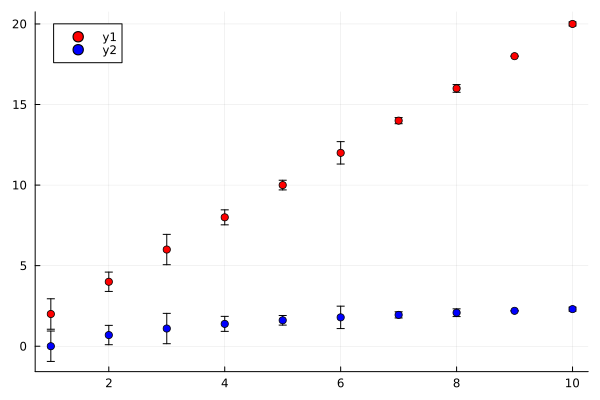

In [32]:
# Mozna odwolywac sie bezposrednio do kolumn w poniższy sposób (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})
#Pkg.add("Plots")
using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


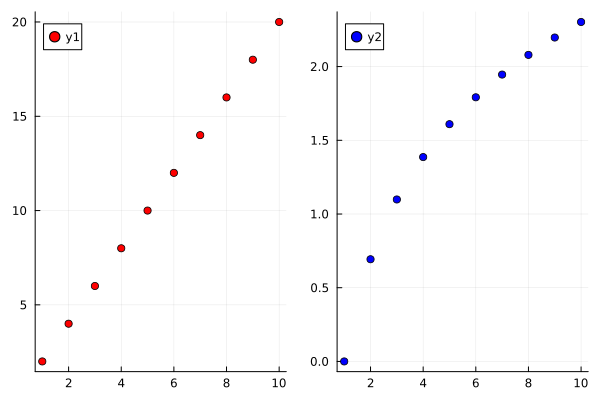

In [33]:
# użycie opcji layout
scatter(df.a, [df.b, df.c],  colour = [:red :blue ], layout=2)

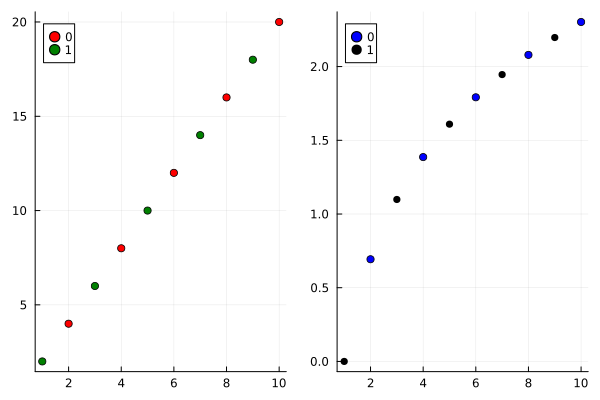

In [34]:
# użycie opcji layout i grup
scatter(df.a, [df.b, df.c], group=df.e,  colour = [:red :blue :green :black], layout=2)

Uwaga: Ze względu na specyfikę języka Julia pomiar czasu wykonania należy brać pod uwagę dopiero od drugiego wywołania danej funkcji
(za pierwszym razem mierzymy również czas kompilacji)

Makro @time - zwraca wartość funkcji i wypisuje czas jej trwania.
Makro @elapsed zwraca czas trwania (może być wygodniejsze w użyciu). 
Warto też oglądnąć działanie makr @timev, @timed, i @allocated

https://docs.julialang.org/en/v1/base/base/#Base.@time

Rand(10) - wylosuj 10-elementową tablicę Float64 z przedziału [0,1)

https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

#### Definicja funkcji Dot Product

In [35]:
function dot_product(v1::Vector{Float64}, v2::Vector{Float64})
    sum = 0

    if length(v1) ≠ length(v2)
        throw(ArgumentError("Vectors must have the same length"))
    end
    
    for i ∈ 1:length(v1)
        sum += v1[i] * v2[i]
    end

    return sum
end

dot_product (generic function with 1 method)

In [36]:
dot_product([1.0, 2.0, 3.0], [4.0, 5.0, 6.0])

32.0

#### Definicja operatora mnożenia macierzy przez wektor

In [37]:
function Base.:*(A::Matrix{Float64}, v::Vector{Float64})
    if size(A, 2) != length(v)
        throw(ArgumentError("Matrix columns must match vector length"))
    end

    result_vector = zeros(size(A, 1))

    for row ∈ 1:size(A, 1)
        result_vector[row] = dot_product(A[row, :], v)
    end

    return result_vector
end

In [38]:
A = [1.0 2.0 3.0; 4.0 5.0 6.0; 7.0 8.0 9.0]
v = [1.0, 2.0, 3.0]

A * v

3-element Vector{Float64}:
 14.0
 32.0
 50.0

#### Testy wydajności

In [39]:
function get_random_vector(length::Int) 
    return rand(length)
end

get_random_vector (generic function with 1 method)

In [40]:
function get_random_matrix(rows::Int, columns::Int)
    return rand(rows, columns)
end

get_random_matrix (generic function with 1 method)

Upewnienie się że funkcje testowane są skompilowane

In [41]:
println(@elapsed dot_product(get_random_vector(1000), get_random_vector(1000)))
println(@elapsed get_random_matrix(1000, 1000) * get_random_vector(1000))

1.2534e-5
0.00654963


Rozmiary danych testowych

In [80]:
sizes = [x*100 for x ∈ 1:100]

100-element Vector{Int64}:
   100
   200
   300
   400
   500
   600
   700
   800
   900
  1000
     ⋮
  9200
  9300
  9400
  9500
  9600
  9700
  9800
  9900
 10000

Przygotowanie DataFrame dla testów

In [138]:
output_df = DataFrame()
output_df.size = []
output_df.dot_product_time = []
output_df.matrix_vector_time = []
output_df

Row,size,dot_product_time,matrix_vector_time
,Any,Any,Any


Testy dla funkcji `dot_product` i `operatora *` dla macierzy i wektora

In [141]:
for size ∈ sizes
    for i ∈ 1:10
        v1 = get_random_vector(size)
        v2 = get_random_vector(size)
        m1 = get_random_matrix(size, size)

        append!(output_df.size, size)
        append!(output_df.dot_product_time, @elapsed dot_product(v1, v2))
        append!(output_df.matrix_vector_time, @elapsed m1 * v1)
    end
end

In [142]:
output_df

Row,size,dot_product_time,matrix_vector_time
,Any,Any,Any
1,100,6.51e-7,7.5134e-5
2,100,1.4e-7,5.5626e-5
3,100,1.1e-7,4.9224e-5
4,100,1.0e-7,5.0357e-5
5,100,1.0e-7,5.1669e-5
6,100,1.0e-7,4.689e-5
7,100,1.0e-7,4.8021e-5
8,100,1.0e-7,4.9925e-5
9,100,1.1e-7,4.7641e-5


Zapisanie df do pliku csv

In [143]:
CSV.write("output_df.csv", output_df)

"output_df.csv"

Odczytanie df z pliku csv

In [144]:
results = CSV.read("output_df.csv", DataFrame)

Row,size,dot_product_time,matrix_vector_time
,Int64,Float64,Float64
1,100,6.51e-7,7.5134e-5
2,100,1.4e-7,5.5626e-5
3,100,1.1e-7,4.9224e-5
4,100,1.0e-7,5.0357e-5
5,100,1.0e-7,5.1669e-5
6,100,1.0e-7,4.689e-5
7,100,1.0e-7,4.8021e-5
8,100,1.0e-7,4.9925e-5
9,100,1.1e-7,4.7641e-5


In [146]:
results_grouped = groupby(results, :size)
results_combined = combine(results_grouped, :dot_product_time => mean, :dot_product_time => std, :matrix_vector_time => mean, :matrix_vector_time => std)

Row,size,dot_product_time_mean,dot_product_time_std,matrix_vector_time_mean,matrix_vector_time_std
,Int64,Float64,Float64,Float64,Float64
1,100,1.417e-7,1.20387e-7,4.4196e-5,1.04628e-5
2,200,2.03e-7,5.37489e-8,0.00201235,0.008367
3,300,3.09e-7,6.52646e-8,0.000409703,5.80912e-5
4,400,5.1055e-7,1.37944e-7,0.000651638,4.56802e-5
5,500,5.961e-7,1.48054e-7,0.00104461,6.50212e-5
6,600,7.534e-7,1.6248e-7,0.00147772,7.38891e-5
7,700,8.802e-7,1.27391e-7,0.00205421,8.1769e-5
8,800,1.2133e-6,2.88989e-7,0.002644,0.000112122
9,900,1.25035e-6,2.88139e-7,0.00341268,0.000188558


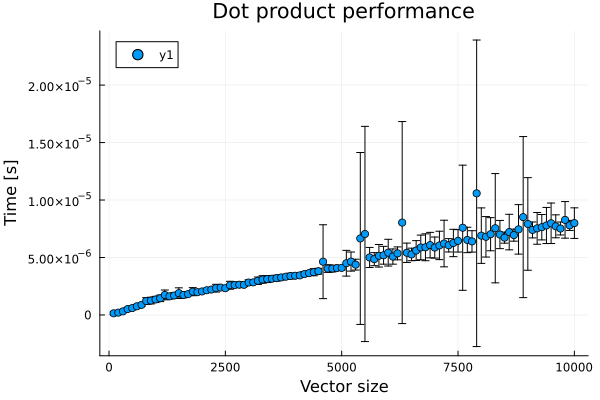

In [149]:
scatter(results_combined.size, results_combined.dot_product_time_mean, yerr=results_combined.dot_product_time_std, xlabel="Vector size", ylabel="Time [s]", title="Dot product performance")

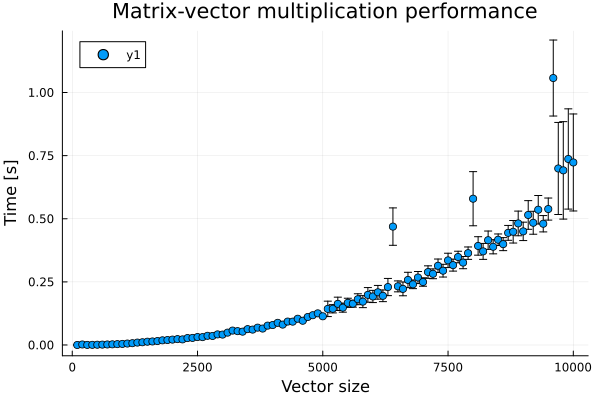

In [151]:
scatter(results_combined.size, results_combined.matrix_vector_time_mean, yerr=results_combined.matrix_vector_time_std, xlabel="Vector size", ylabel="Time [s]", title="Matrix-vector multiplication performance")

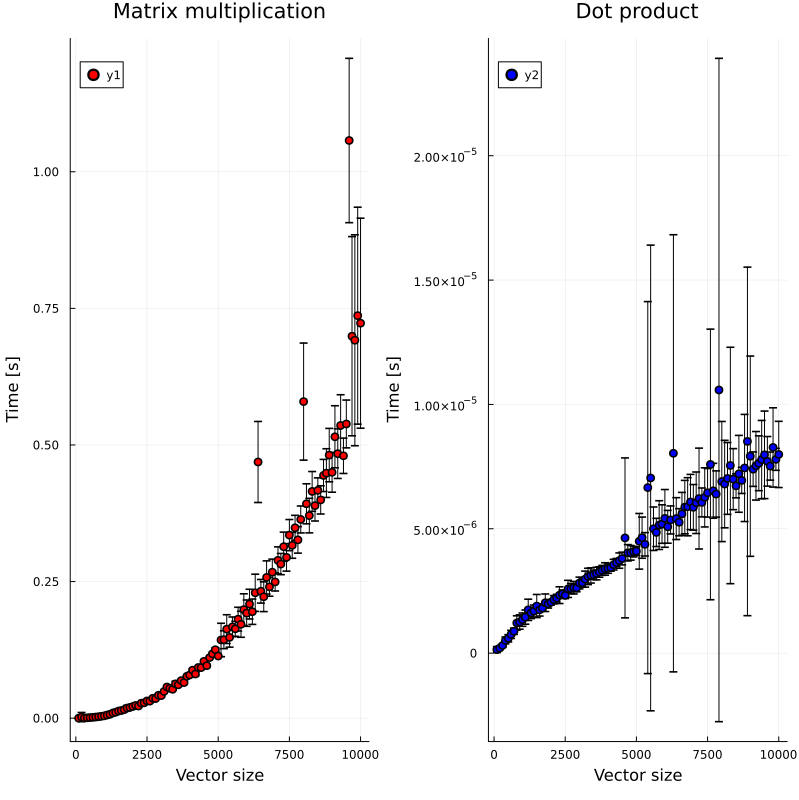

In [165]:
scatter(results_combined.size, 
        [results_combined.matrix_vector_time_mean, results_combined.dot_product_time_mean], 
        colour=[:red :blue], 
        yerr=[results_combined.matrix_vector_time_std results_combined.dot_product_time_std], 
        layout=2, 
        xlabel="Vector size", ylabel="Time [s]", title=["Matrix multiplication" "Dot product"], size=(800, 800))